In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
from google.colab import files
uploaded = files.upload()

Saving Fake.csv.csv to Fake.csv (1).csv


In [33]:
from google.colab import files
uploaded = files.upload()

Saving True_news.csv.csv to True_news.csv (1).csv


In [39]:
df_fake = pd.read_csv('Fake.csv.csv')
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
df_true = pd.read_csv('True_news.csv.csv')
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


setting the target variable for the real news 1 and for the fake news setting as 0

In [6]:
df_fake['Target'] = 0
df_true['Target'] = 1

Concatinating both the dataset

In [7]:
df = pd.concat([df_true, df_fake], ignore_index=True, sort=False)
df.head()

,title,text,subject,date,Target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [8]:
df.tail()

,title,text,subject,date,Target
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
44897,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


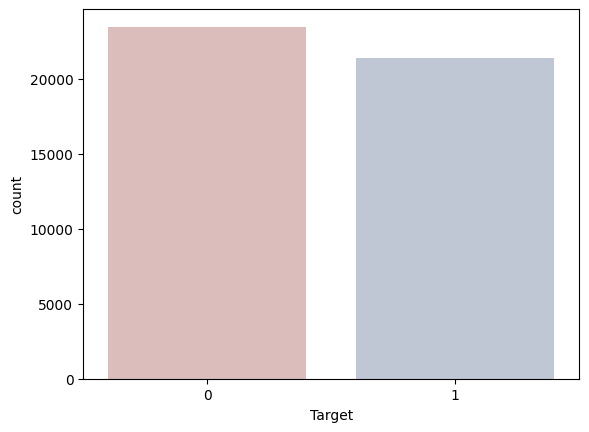

In [9]:
#counting the fake and real news
sns.countplot(x = 'Target',data = df,palette = 'vlag_r')
plt.show()
# we can see from the graph that there are more fake news present than the real news

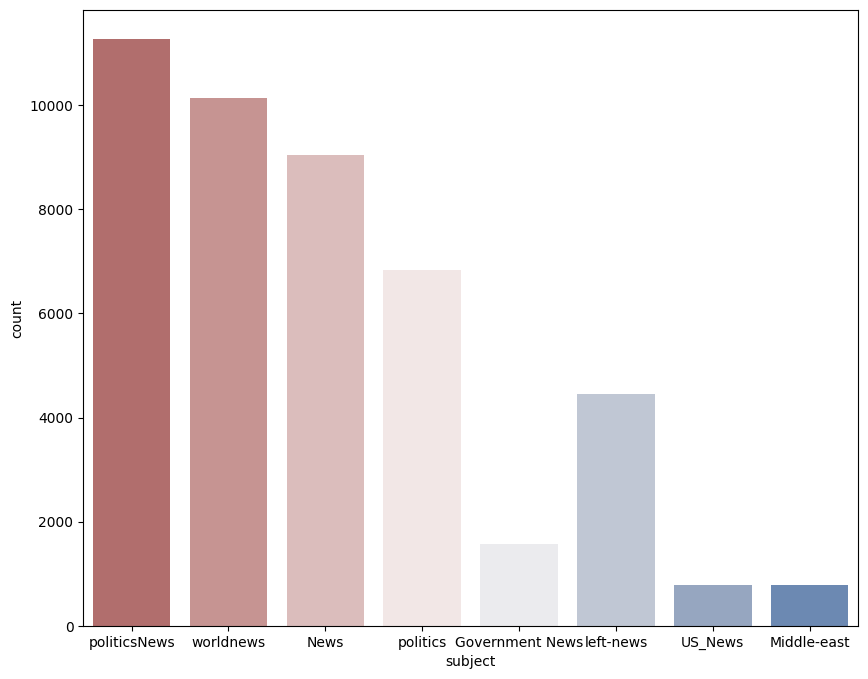

In [10]:
#Counting the type of news present in our dataset
plt.figure(figsize=(10, 8))
sns.countplot(x = 'subject',data = df,palette = 'vlag_r')
plt.show()
#political news are the most amount of news that we have found in our dataset

In [11]:
df['text']= df['subject'] + " " + df['title'] + " " + df['text']
del df['title']
del df['subject']
del df['date']
df.head(),df.tail()

(                                                text  Target
 0  politicsNews As U.S. budget fight looms, Repub...       1
 1  politicsNews U.S. military to accept transgend...       1
 2  politicsNews Senior U.S. Republican senator: '...       1
 3  politicsNews FBI Russia probe helped by Austra...       1
 4  politicsNews Trump wants Postal Service to cha...       1,
                                                     text  Target
 44893  Middle-east McPain: John McCain Furious That I...       0
 44894  Middle-east JUSTICE? Yahoo Settles E-mail Priv...       0
 44895  Middle-east Sunnistan: US and Allied ‘Safe Zon...       0
 44896  Middle-east How to Blow $700 Million: Al Jazee...       0
 44897  Middle-east 10 U.S. Navy Sailors Held by Irani...       0)

In [12]:
df['message_len'] = df.text.apply(len)
df.head()

,text,Target,message_len
0,"politicsNews As U.S. budget fight looms, Repub...",1,4737
1,politicsNews U.S. military to accept transgend...,1,4155
2,politicsNews Senior U.S. Republican senator: '...,1,2863
3,politicsNews FBI Russia probe helped by Austra...,1,2534
4,politicsNews Trump wants Postal Service to cha...,1,5287


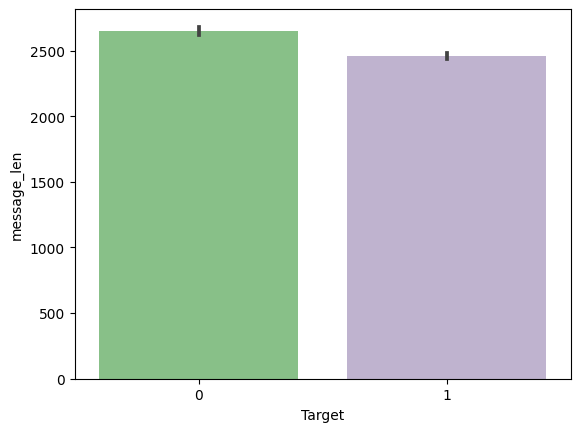

In [13]:
sns.barplot(x='Target',y='message_len',data=df,palette = "Accent")
plt.show()
#the length of the fake news is more than the real news

text pre-***Processing***

In [14]:
# removing the stop words
# removing the Puntuations
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer
ps=PorterStemmer()

In [15]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
from bs4 import BeautifulSoup

def cleaning(text):
    soup = BeautifulSoup(text, "html.parser")
    text = soup.get_text()
    return text

df['text'] = df['text'].apply(cleaning)

<ipython-input-16-f35a38940e4f>:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [35]:
corpus=[]
for i in range(len(df)):
    #sub-->removing the words
    # and in our case we are removing the everything except the letters a-z and A-Z and if we want to keep the numbers we have
    # write [^a-bA-Z0-9]
    rp=re.sub('[^a-zA-Z]'," ",df['text'][i])
    # we are converting everyting into the lower case bcoz the stop words that we have in our library are small
    rp=rp.lower()
    # and we are making it lower coz we dont want a perticulr word to treated as differently (The and the)
    # will be treated differently if they are not converted to lower case
    rp=rp.split()
    #here it is checking if the words that we have in (rp) is in the present in our library of stop words if not then are
    #gong to store it into the rp again
    rp=[ps.stem(word) for word in rp if not word  in set(stopwords.words('english'))]
    rp=" ".join(rp)
    corpus.append(rp)
corpus

KeyboardInterrupt: ignored

In [18]:
df['text']=corpus
df.drop(columns = 'message_len',inplace = True)
df.head()

,text,Target
0,politicsnew u budget fight loom republican fli...,1
1,politicsnew u militari accept transgend recrui...,1
2,politicsnew senior u republican senat let mr m...,1
3,politicsnew fbi russia probe help australian d...,1
4,politicsnew trump want postal servic charg muc...,1


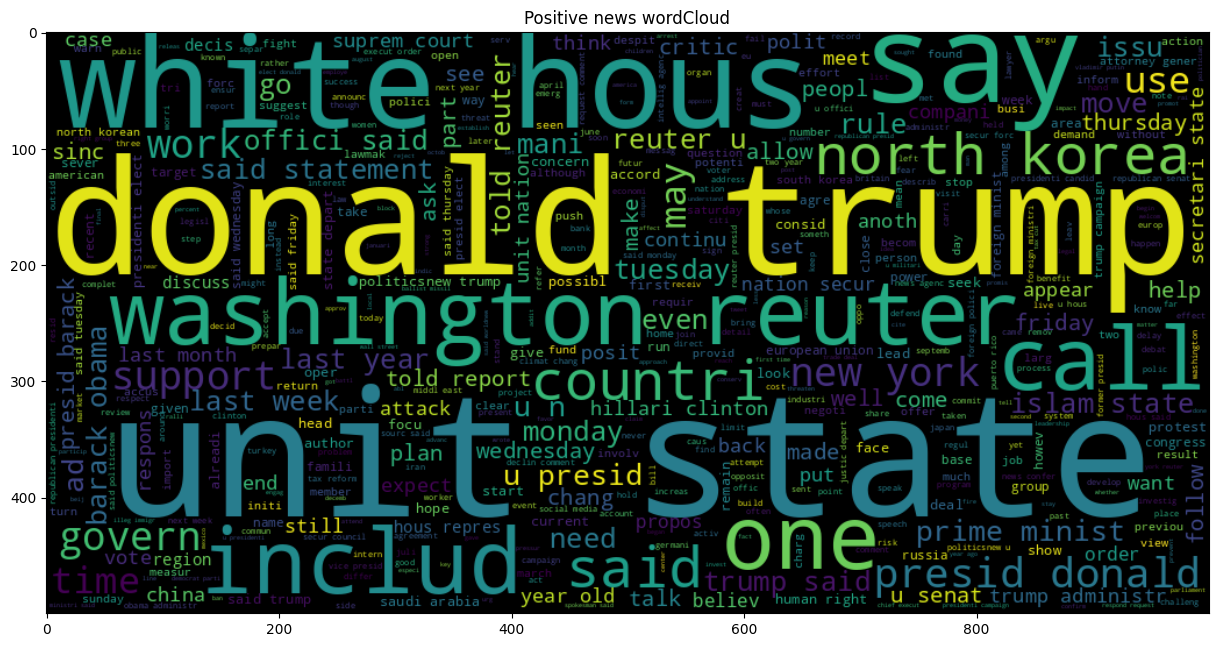

In [19]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize = (15,15))
#max_words :-The maximum number of word what we will be showing in the wordcloud
#stopwordsc:- The words that will be eliminated. If None, the build-in STOPWORDS
            # list will be used. Ignored if using generate_from_frequencies.
wc = WordCloud(max_words = 500 ,
               width = 1000 ,
               height = 500 ,
               stopwords = STOPWORDS).generate(" ".join(df[df.Target == 1].text))
plt.title('Positive news wordCloud')
plt.imshow(wc , interpolation = 'bilinear')

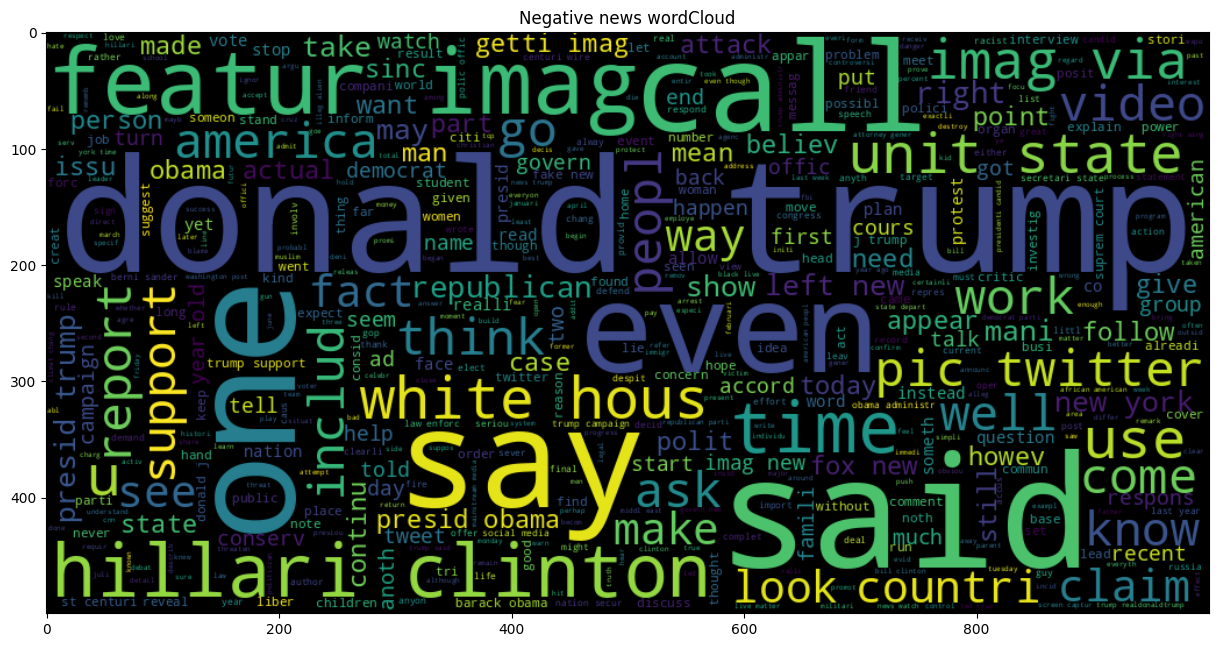

In [20]:
plt.figure(figsize = (15,15))
#max_words :-The maximum number of word what we will be showing in the wordcloud
#stopwordsc:- The words that will be eliminated. If None, the build-in STOPWORDS
            # list will be used. Ignored if using generate_from_frequencies.
wc = WordCloud(max_words = 500 ,
               width = 1000 ,
               height = 500 ,
               stopwords = STOPWORDS).generate(" ".join(df[df.Target == 0].text))
plt.title('Negative news wordCloud')
plt.imshow(wc , interpolation = 'bilinear')


Building the **model**

In [21]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Embedding
from sklearn.metrics import classification_report,confusion_matrix

In [22]:
#Setting up vocabulary size
voc_size=10000

#One hot encoding
onehot_repr = [one_hot(words,voc_size)for words in corpus]

In [23]:
#Setting sentence length
sent_length=30
#we can set this sentence length and by this all the sentences will have the same length ie 5000 and the
# sentences which dont have length of 5000 will get padded with zeros

#Padding the sentences
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[ 411  916 5510 ... 5891 8566 3029]
 [4126 4340 3841 ... 3378 4126 4319]
 [9268   79 7994 ... 5290 1998 4011]
 ...
 [5990 7137 4888 ... 1510 5493 4440]
 [7416 4434 4948 ... 1510  904 1766]
 [7262 7856 1079 ... 1510 3176 4440]]


In [24]:
#Creating the lstm model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))#  to avoid the oer-fitting prob we are going to drop some of the Neurons from thr model
model.add(LSTM(units = 100)) #Adding 128 lstm neurons in the layer
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

#Compiling the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 40)            400000    
                                                                 
 dropout (Dropout)           (None, 30, 40)            0         
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 456,501
Trainable params: 456,501
Non-trainable params: 0
_________________________________________________________________
None


In [25]:
# Converting the X and y as array
X_final=np.array(embedded_docs)
y_final=np.array(df['Target'])

#Check shape of X and y final
X_final.shape,y_final.shape

((44898, 30), (44898,))

In [26]:
# Train test split of the X and y final
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.30, shuffle= True)

In [28]:
# Fitting with 10 epochs and 64 batch size
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
492/492 [==============================] - 34s 70ms/step - loss: 0.0099 - accuracy: 0.9969 - val_loss: 0.1472 - val_accuracy: 0.9676
Epoch 2/10
492/492 [==============================] - 19s 39ms/step - loss: 0.0070 - accuracy: 0.9982 - val_loss: 0.1701 - val_accuracy: 0.9670
Epoch 3/10
492/492 [==============================] - 20s 41ms/step - loss: 0.0077 - accuracy: 0.9975 - val_loss: 0.1659 - val_accuracy: 0.9653
Epoch 4/10
492/492 [==============================] - 20s 40ms/step - loss: 0.0042 - accuracy: 0.9989 - val_loss: 0.1917 - val_accuracy: 0.9650
Epoch 5/10
492/492 [==============================] - 19s 39ms/step - loss: 0.0050 - accuracy: 0.9983 - val_loss: 0.1881 - val_accuracy: 0.9677
Epoch 6/10
492/492 [==============================] - 20s 41ms/step - loss: 0.0055 - accuracy: 0.9982 - val_loss: 0.1923 - val_accuracy: 0.9672
Epoch 7/10
492/492 [==============================] - 20s 41ms/step - loss: 0.0045 - accuracy: 0.9986 - val_loss: 0.1764 - val_accuracy:

In [45]:
!pip install plot_confusion_matrix

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement plot_confusion_matrix (from versions: none)
ERROR: No matching distribution found for plot_confusion_matrix


In [44]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

ImportError: ignored

In [36]:
#Prediction is in probability of news being real, so converting into classes
# Class 0 (Fake) if predicted prob < 0.5, else class 1 (Real)
y_pred = (model.predict(X_test) >= 0.5).astype("int")

421/421 [==============================] - 3s 6ms/step


In [40]:
confusion_matrix(y_test,y_pred) ## check confusion matrix

array([[6738,  238],
       [ 195, 6299]])

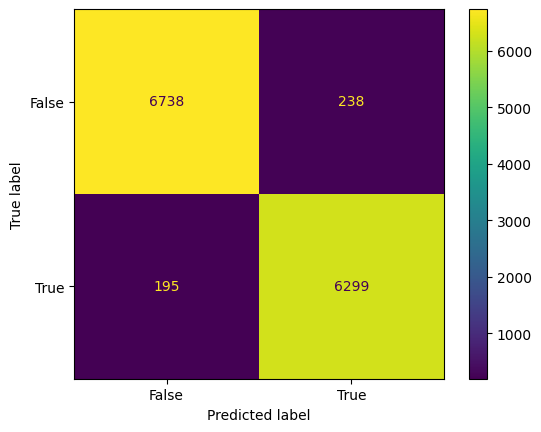

In [47]:
#Creating confusion matrix
#confusion_matrix(y_test,y_pred)
cm = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()

In [38]:
report = classification_report(y_test,y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      6976
           1       0.96      0.97      0.97      6494

    accuracy                           0.97     13470
   macro avg       0.97      0.97      0.97     13470
weighted avg       0.97      0.97      0.97     13470

